In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

/Users/pkumar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# Use this to upload a data file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ERROR: google-auth 1.14.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
You should consider upgrading via the '/Users/pkumar/anaconda3/bin/python -m pip install --upgrade pip' command.


ContextualVersionConflict: (googleapis-common-protos 1.5.6 (/Users/pkumar/anaconda3/lib/python3.6/site-packages), Requirement.parse('googleapis-common-protos<2.0dev,>=1.6.0'), {'google-api-core'})

In [ ]:
# link = 'https://drive.google.com/open?id=1873O5EQutT9YjYmnH5rnBJRBYOTwn3R_' # The shareable link
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('volatility.csv')  
df = pd.read_csv('volatility.csv')
df1 = pd.read_csv('volatility.csv')

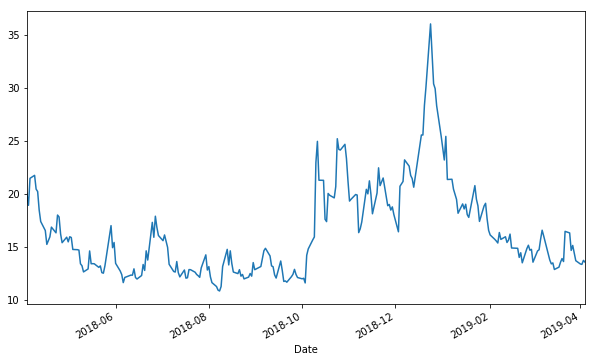

In [ ]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'], drop=True)
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

In [ ]:
df1.shape

(253, 7)

TypeError: Empty 'DataFrame': no numeric data to plot

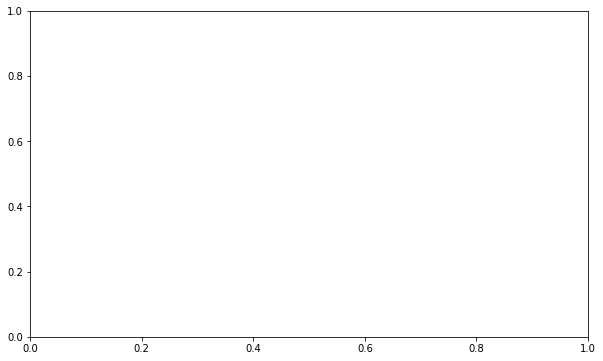

In [ ]:
split_date = pd.Timestamp('2018-01-01')
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1,1))
test_sc = scaler.transform(test.values.reshape(-1,1))

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
X_test.shape

(316, 1)

In [ ]:
# A simple feedforward NN
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
941/941 [==============================] - 1s 1ms/step - loss: 0.0311
Epoch 2/100
941/941 [==============================] - 1s 843us/step - loss: 0.0080
Epoch 3/100
941/941 [==============================] - 1s 874us/step - loss: 0.0074
Epoch 4/100
941/941 [==============================] - 1s 804us/step - loss: 0.0074
Epoch 5/100
941/941 [==============================] - 1s 812us/step - loss: 0.0073
Epoch 6/100
941/941 [==============================] - 1s 784us/step - loss: 0.0073
Epoch 7/100
941/941 [==============================] - 1s 788us/step - loss: 0.0073
Epoch 8/100
941/941 [==============================] - 1s 794us/step - loss: 0.0073
Epoch 9/100
941/941 [==============================] - 1s 801us/step - loss: 0.0073
Epoch 10/100
941/941 [==============================] - 1s 799us/step - loss: 0.0072
Epoch 11/100
941/941 [===================

In [ ]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.863
The R2 score on the Test set is:	0.799


In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

#for s in range(-1,-4,-1):
for s in range(-1,-4,-1):
    train_sc_df['X_{}'.format(-s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(-s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (939, 3, 1)
Test shape:  (314, 3, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(939, 3)

In [ ]:
# A simple LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Colocations handled automatically by placer.


ValueError: ignored

In [ ]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.873
The R2 score on the Test set is:	0.810


In [ ]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

316/316 [==============================] - 0s 1ms/step
NN: 0.017601
LSTM: 0.016687


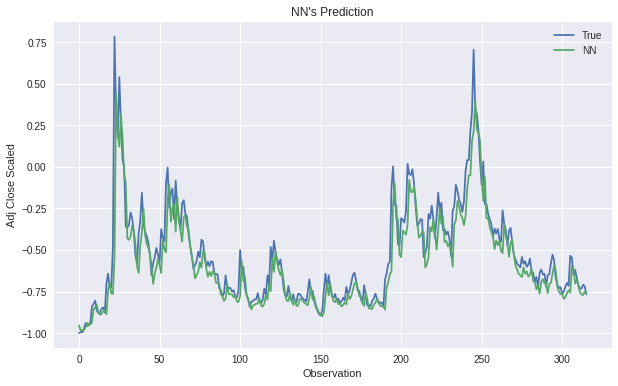

In [ ]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

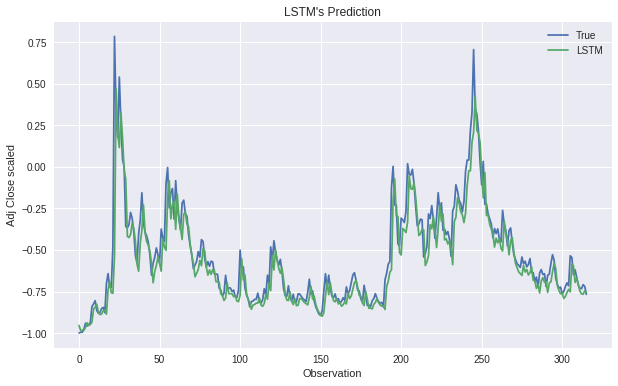

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from numpy import newaxis

#df1 = pd.read_csv('aapl.csv',delimiter=',',usecols=['Date','Open','High','Low','Close'])
df1.Date = pd.to_datetime(df1.Date)
df1['Mean'] = (df1.High + df1.Low )/2.0


from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1.Mean.values, freq=365) 
trace1 = go.Scatter(
    x = df1.Date,y = decomposition.trend,
    name = 'Trend',mode='lines'
)
trace2 = go.Scatter(
    x = df1.Date,y = decomposition.seasonal,
    name = 'Seasonal',mode='lines'
)
trace3 = go.Scatter(
    x = df1.Date,y = decomposition.resid,
    name = 'Residual',mode='lines'
)
trace4 = go.Scatter(
    x = df1.Date,y = df1.Mean,
    name = 'Mean Stock Value',mode='lines'
)

# a. Standard Average of Window
Mean_list = list(df1.Mean)
window_size = 50
N = len(Mean_list)
std_avg_predictions = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):
    std_avg_predictions.append(np.mean(Mean_list[pred_idx-window_size:pred_idx]))

# b. EXP Average of Window
window_size = 100
run_avg_predictions = []
running_mean = 0.0
run_avg_predictions.append(running_mean)
decay = 0.8

for pred_idx in range(1,N):
    running_mean = running_mean*decay + (1.0-decay)*Mean_list[pred_idx-1]
    run_avg_predictions.append(running_mean)

trace5 = go.Scatter(
    x = df1.Date,y = std_avg_predictions,
    name = 'Window AVG',mode='lines'
)
trace6 = go.Scatter(
    x = df1.Date,y = run_avg_predictions,
    name = 'Moving AVG',mode='lines'
)


from statsmodels.tsa.ar_model import AR
window_size = 50
ar_list = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):

    current_window = Mean_list[pred_idx-window_size:pred_idx]
    model = AR(current_window)
    model_fit = model.fit(49)
    current_predict = model_fit.predict(49,49)[0]
    ar_list.append(current_predict)

trace7 = go.Scatter(
    x = df1.Date,y = ar_list,
    name = 'Auto Regression',mode='lines'
)

configure_plotly_browser_state()
init_notebook_mode(connected=False)
data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
iplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# data = [trace1,trace2]
#plt.plot(data)
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 12
# fig_size[1] = 9
# plt.rcParams["figure.figsize"] = fig_size
# plt.plot(decomposition.trend)
# plt.plot(decomposition.seasonal)
# plt.plot(decomposition.resid)
# plt.plot(std_avg_predictions)
# plt.plot(run_avg_predictions)
# plt.show(ar_list)